In [1]:
### Import Libraries ###
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime as dt
import fix_yahoo_finance as yf

In [36]:
### Set Date Period ###
start = dt.datetime(2009,1,1)
end = dt.datetime.now()

In [37]:
### Reading datas ###
yf.pdr_override()

# Read HSI - 恒生指數
hsi = pd.DataFrame()
hsi = web.get_data_yahoo('^HSI', start, end)

# Read HSCE - 國企指數
hsce = pd.DataFrame()
hsce = web.get_data_yahoo('^HSCE', start, end)

# Read 000001.SS - 上證綜合指數
shanghai = pd.DataFrame()
shanghai = web.get_data_yahoo('000001.SS', start, end)

# Read NASDAQ - 納斯達克指數
nasdaq = pd.DataFrame()
nasdaq = web.get_data_yahoo('^IXIC', start, end)

# Read DJI - 道瓊斯工業平均指數
dji = pd.DataFrame()
dji = web.get_data_yahoo('^DJI', start, end)

# Read SNP - 標普500指數
snp = pd.DataFrame()
snp = web.get_data_yahoo('^GSPC', start, end)

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


In [4]:
# Define a list of stock whom are HSI
stocks_list = {'Stock No': ['0011.HK', '0003.HK', '0386.HK', 
               '1038.HK', '0941.HK', '2319.HK', '1044.HK', 
               '0288.HK', '0006.HK', '0002.HK', '0267.HK', 
               '1398.HK', '1299.HK', '2388.HK', '0700.HK', 
               '0083.HK', '0012.HK', '2318.HK', '0883.HK', 
               '1109.HK', '1997.HK', '1928.HK', '0016.HK', 
               '0101.HK', '2628.HK', '2018.HK', '0836.HK', 
               '0017.HK', '0027.HK', '1093.HK'],
               'Stock Name': ['0011 Hang Seng Bank', '0003 Towngas', 
               '0386 中國石油化工股份', '1038 長江基建集團 ', 
               '0941 China Mobile', '2319 蒙牛乳業', '1044 恆安國際' , '0288 萬洲國際',
               '0006 電能實業', '0002 中電控股', '0267 中信股份', '1398 工商銀行', '1299 友邦保險',
               '2388 中銀香港', '0700 騰訊控股', '0083 信和置業', '0012 恆基地產', '2318 中國平安',
               '0883 中國海洋石油', '1109 華潤置地', '1997 九龍倉置業', '1928 金沙中國有限公司',
               '0016 新鴻基地產', '0101 恆隆地產', '2628 中國人壽', '2018 瑞聲科技', '0836 華潤電力',
               '0017 新世界發展', '0027 銀河娛樂', '1093 石藥集團']}
stocks_list = pd.DataFrame(data=stocks_list)

In [5]:
# Read List of stock
stocks = pd.DataFrame()
stocks = web.get_data_yahoo(stocks_list['Stock No'].values.tolist(), start, end)

[*********************100%***********************]  30 of 30 downloaded


In [6]:
hsi.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,21782.619141,21794.839844,21227.609375,21327.119141,21327.119141,1712094800
2016-01-05,21318.689453,21452.740234,21095.900391,21188.720703,21188.720703,1484745100
2016-01-06,21142.630859,21199.619141,20947.300781,20980.810547,20980.810547,1651083400
2016-01-07,20772.599609,20826.439453,20323.970703,20333.339844,20333.339844,-2147483648
2016-01-08,20491.880859,20596.419922,20324.619141,20453.710938,20453.710938,2078133200


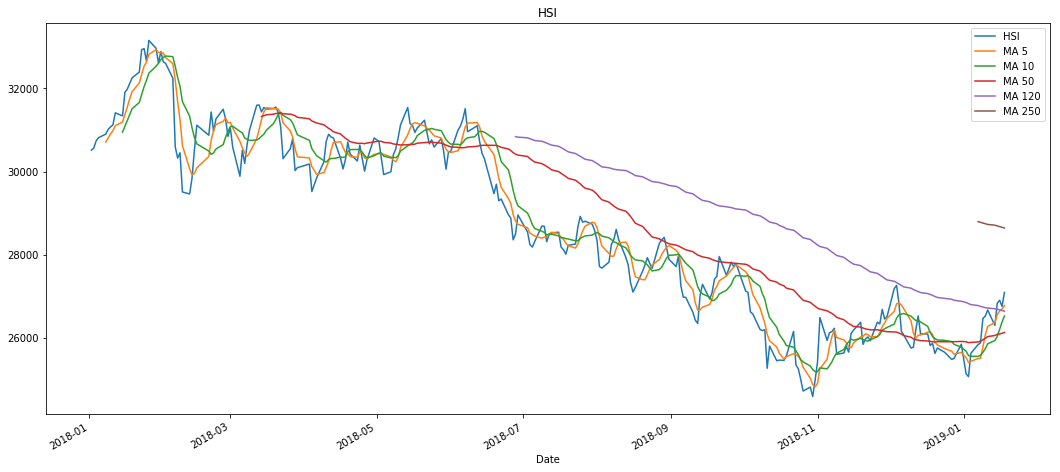

In [38]:
## Calculate each Index MA ##
# HSI
hsi['Total Traded'] = pd.Series(hsi['Open'] * hsi['Volume'], index=hsi.index)
hsi['MA 5'] = hsi['Close'].rolling(window=5).mean()
hsi['MA 10'] = hsi['Close'].rolling(window=10).mean()
hsi['MA 50'] = hsi['Close'].rolling(window=50).mean()
hsi['MA 120'] = hsi['Close'].rolling(window=120).mean()
hsi['MA 250'] = hsi['Close'].rolling(window=250).mean()

hsi['Close'].plot(label='HSI', figsize=(18,8))
hsi['MA 5'].plot(label='MA 5')
hsi['MA 10'].plot(label='MA 10')
hsi['MA 50'].plot(label='MA 50')
hsi['MA 120'].plot(label='MA 120')
hsi['MA 250'].plot(label='MA 250')

plt.title('HSI')
plt.legend()

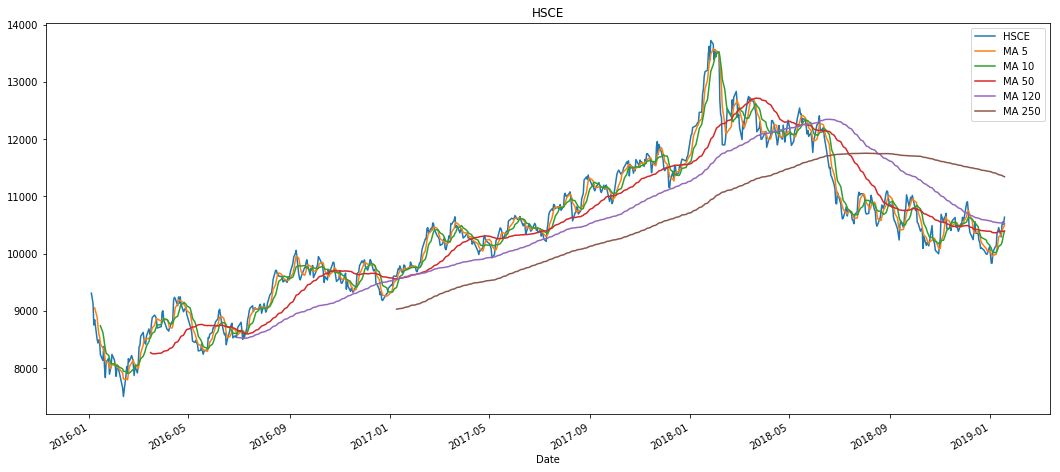

In [28]:
# HSCE
hsce['Total Traded'] = pd.Series(hsce['Open'] * hsce['Volume'], index=hsce.index)
hsce['MA 5'] = hsce['Close'].rolling(window=5).mean()
hsce['MA 10'] = hsce['Close'].rolling(window=10).mean()
hsce['MA 50'] = hsce['Close'].rolling(window=50).mean()
hsce['MA 120'] = hsce['Close'].rolling(window=120).mean()
hsce['MA 250'] = hsce['Close'].rolling(window=250).mean()

hsce['Close'].plot(label='HSCE', figsize=(18,8))
hsce['MA 5'].plot(label='MA 5')
hsce['MA 10'].plot(label='MA 10')
hsce['MA 50'].plot(label='MA 50')
hsce['MA 120'].plot(label='MA 120')
hsce['MA 250'].plot(label='MA 250')

plt.title('HSCE')
plt.legend()

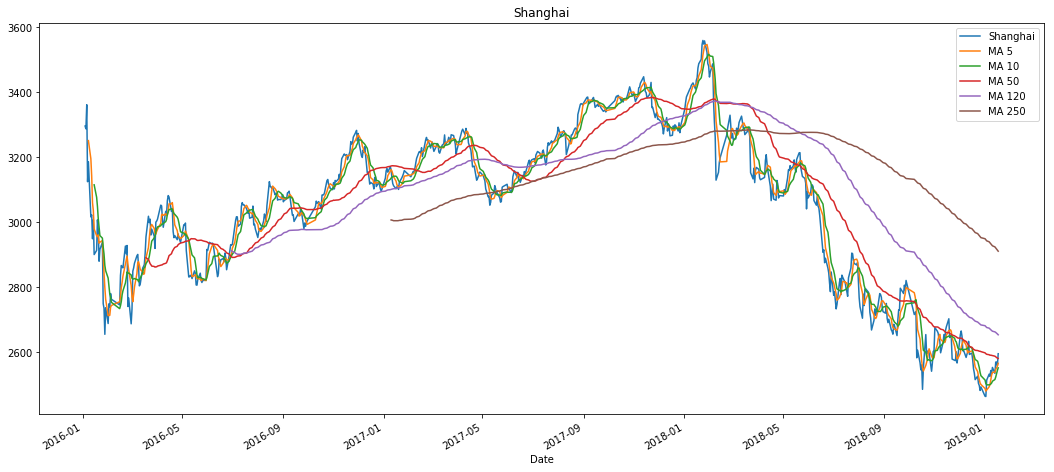

In [30]:
# Shanghai
shanghai['Total Traded'] = pd.Series(shanghai['Open'] * shanghai['Volume'], index=shanghai.index)
shanghai['MA 5'] = shanghai['Close'].rolling(window=5).mean()
shanghai['MA 10'] = shanghai['Close'].rolling(window=10).mean()
shanghai['MA 50'] = shanghai['Close'].rolling(window=50).mean()
shanghai['MA 120'] = shanghai['Close'].rolling(window=120).mean()
shanghai['MA 250'] = shanghai['Close'].rolling(window=250).mean()

shanghai['Close'].plot(label='Shanghai', figsize=(18,8))
shanghai['MA 5'].plot(label='MA 5')
shanghai['MA 10'].plot(label='MA 10')
shanghai['MA 50'].plot(label='MA 50')
shanghai['MA 120'].plot(label='MA 120')
shanghai['MA 250'].plot(label='MA 250')

plt.title('Shanghai')
plt.legend()

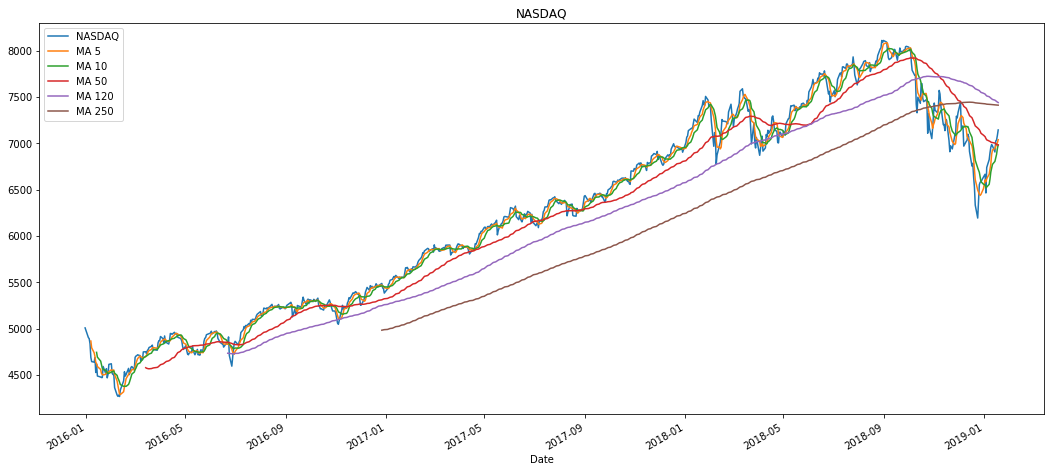

In [33]:
# NASDAQ
nasdaq['Total Traded'] = pd.Series(nasdaq['Open'] * nasdaq['Volume'], index=nasdaq.index)
nasdaq['MA 5'] = nasdaq['Close'].rolling(window=5).mean()
nasdaq['MA 10'] = nasdaq['Close'].rolling(window=10).mean()
nasdaq['MA 50'] = nasdaq['Close'].rolling(window=50).mean()
nasdaq['MA 120'] = nasdaq['Close'].rolling(window=120).mean()
nasdaq['MA 250'] = nasdaq['Close'].rolling(window=250).mean()

nasdaq['Close'].plot(label='NASDAQ', figsize=(18,8))
nasdaq['MA 5'].plot(label='MA 5')
nasdaq['MA 10'].plot(label='MA 10')
nasdaq['MA 50'].plot(label='MA 50')
nasdaq['MA 120'].plot(label='MA 120')
nasdaq['MA 250'].plot(label='MA 250')

plt.title('NASDAQ')
plt.legend()

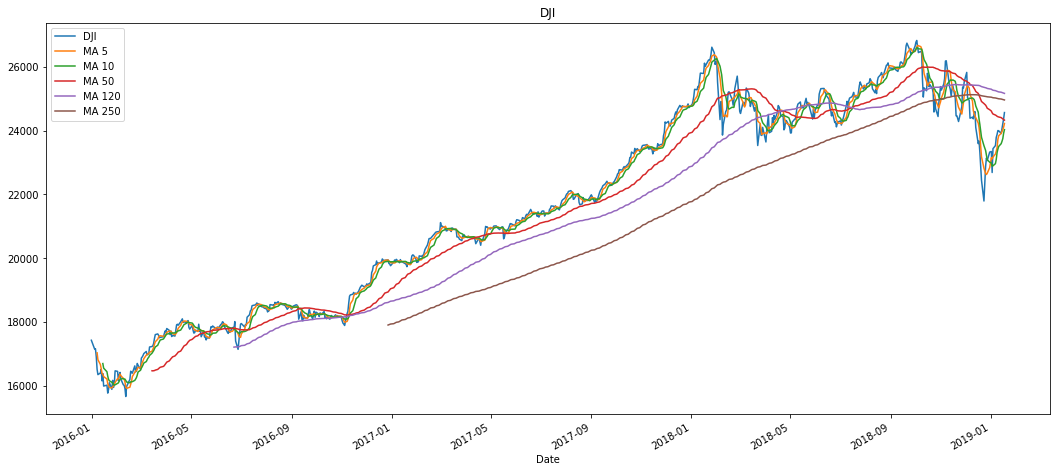

In [34]:
# DJI
dji['Total Traded'] = pd.Series(dji['Open'] * dji['Volume'], index=dji.index)
dji['MA 5'] = dji['Close'].rolling(window=5).mean()
dji['MA 10'] = dji['Close'].rolling(window=10).mean()
dji['MA 50'] = dji['Close'].rolling(window=50).mean()
dji['MA 120'] = dji['Close'].rolling(window=120).mean()
dji['MA 250'] = dji['Close'].rolling(window=250).mean()

dji['Close'].plot(label='DJI', figsize=(18,8))
dji['MA 5'].plot(label='MA 5')
dji['MA 10'].plot(label='MA 10')
dji['MA 50'].plot(label='MA 50')
dji['MA 120'].plot(label='MA 120')
dji['MA 250'].plot(label='MA 250')

plt.title('DJI')
plt.legend()

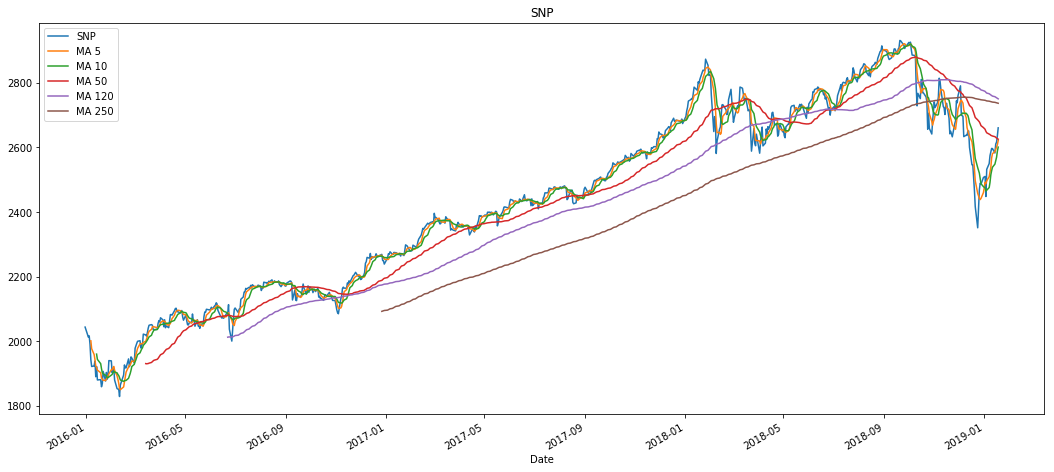

In [35]:
# SNP
snp['Total Traded'] = pd.Series(snp['Open'] * snp['Volume'], index=snp.index)
snp['MA 5'] = snp['Close'].rolling(window=5).mean()
snp['MA 10'] = snp['Close'].rolling(window=10).mean()
snp['MA 50'] = snp['Close'].rolling(window=50).mean()
snp['MA 120'] = snp['Close'].rolling(window=120).mean()
snp['MA 250'] = snp['Close'].rolling(window=250).mean()

snp['Close'].plot(label='SNP', figsize=(18,8))
snp['MA 5'].plot(label='MA 5')
snp['MA 10'].plot(label='MA 10')
snp['MA 50'].plot(label='MA 50')
snp['MA 120'].plot(label='MA 120')
snp['MA 250'].plot(label='MA 250')

plt.title('SNP')
plt.legend()